In [ ]:
import numpy as np

In [ ]:
# For Over-sampling, we duplicate this 30 times.
pal_only = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
[0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
[1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

def custom_accuracy_score(y_test, y_pred):
    y_pred = np.array(y_pred).flatten()
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    return correct_predictions / total_predictions

def precision(y_true, y_pred):
  tp = sum(y_true[i] == 1 and y_pred[i] == 1 for i in range(len(y_true)))
  fp = sum(y_true[i] == 0 and y_pred[i] == 1 for i in range(len(y_true)))
  return tp / (tp + fp)

def recall(y_true, y_pred):
  tp = sum(y_true[i] == 1 and y_pred[i] == 1 for i in range(len(y_true)))
  fn = sum(y_true[i] == 1 and y_pred[i] == 0 for i in range(len(y_true)))
  return tp / (tp + fn)

def f1_score(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  return 2 * (p * r) / (p + r)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# '010b': The format specifier indicating binary representation with leading zeros ('0') and a total width of 10 ('10').
all_possible = np.array([[int(x) for x in format(i, '010b')] for i in range(1024)])
palidrome_repeated = np.tile(pal_only, (30,1))
all_binary_strings = np.vstack((palidrome_repeated, all_possible))

In [ ]:
print(all_binary_strings)
print(len(all_binary_strings))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]
1984


In [ ]:
np.random.shuffle(all_binary_strings)
# 1: This specifies that the array should be repeated only once along the second axis (horizontally).
labels = np.array([1 if np.array_equal(x, x[::-1]) else 0 for x in all_binary_strings])

In [ ]:
input_layer_size = 10
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.001
epochs = 20000
kfolds = 5
fold_size = len(all_binary_strings) // kfolds

np.random.seed(0)
'''
That normalization term is famous technique: Xavier initialization.
  : Used to initialize the weights such that the variance of the activations are the same across every layer.
'''
W1 = np.random.randn(input_layer_size, hidden_layer_size) * np.sqrt(2. / input_layer_size)
B1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_layer_size) * np.sqrt(2. / hidden_layer_size)
B2 = np.zeros((1, output_layer_size))

p_scores = []
r_scores = []
f_scores = []

accuracy_scores = []
classwise_reports = []

In [ ]:
for fold in range(kfolds):
    test_indices = range(fold * fold_size, (fold + 1) * fold_size)
    X_test, y_test = all_binary_strings[test_indices], labels[test_indices]
    X_train = np.delete(all_binary_strings, test_indices, axis=0)
    y_train = np.delete(labels, test_indices)
    m =X_train.shape[1]


    for epoch in range(epochs):

        net1 = np.dot(X_train, W1) + B1
        O1 = relu(net1)

        net2 = np.dot(O1, W2) + B2
        O2 = sigmoid(net2)

        dnet2 = y_train.reshape(-1, 1) - O2
        dW2 = (1/m) * np.dot(O1.T, dnet2)
        dB2 = (1/m) * np.sum(dnet2, axis=0, keepdims=True)

        dnet1 = np.dot(dnet2, W2.T) * relu_derivative(O1)
        dW1 = (1/m) * np.dot(X_train.T, dnet1)
        dB1 = (1/m) * np.sum(dnet1, axis=0, keepdims=True)

        W2 += learning_rate * dW2
        B2 +=  learning_rate * dB2
        W1 += learning_rate * dW1
        B1 += learning_rate * dB1

    net1_test = np.dot(X_test, W1) + B1
    O1_test = relu(net1_test)
    net2_test = np.dot(O1_test, W2) + B2
    O2_test = sigmoid(net2_test)
    predictions = (O2_test > 0.5).astype(int)

    accuracy = custom_accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

In [ ]:
overall_accuracy = np.mean(accuracy_scores)
print("Overall Accuracy:", overall_accuracy * 100)
classwise_accuracies = []
for i in range(len(np.unique(y_test))):
    class_indices = np.where(y_test == i)[0]
    class_accuracy = custom_accuracy_score(
        y_test[class_indices], predictions[class_indices])
    classwise_accuracies.append(class_accuracy*100)
    print("Class", i, "Accuracy:", class_accuracy*100)

Overall Accuracy: 99.49494949494951
Class 0 Accuracy: 99.49238578680203
Class 1 Accuracy: 100.0


# Visualization

In [ ]:
def predict_palindrome(input_string, W1, B1, W2, B2):
    # Convert the input string into a binary array
    input_array = np.array([[int(x) for x in input_string]])

    net1 = np.dot(input_array, W1) + B1
    O1 = relu(net1)
    net2 = np.dot(O1, W2) + B2
    O2 = sigmoid(net2)

    # Convert final output to binary prediction (0 or 1)
    prediction = int(O2 > 0.5)

    return prediction

# Example usage:
input_string = "0101111010"  # Example input string
prediction = predict_palindrome(input_string, W1, B1, W2, B2)
print("Prediction for input '{}': {}".format(input_string, prediction))

Prediction for input '0101111010': 1


In [ ]:
import os
import ecco
from IPython import display as d
from sklearn import decomposition

c:\Users\waisullah yousofi\.conda\envs\env38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
class NMF:
    """ Conducts Non-negative Matrix Factorization and holds the models and components """

    def __init__(self, activations, n_components, token_ids, binary_string):
        """
        Receives a neuron activations matrix from and decomposes it using NMF into the number
        of components specified by `n_components`.
        For example:
        if activation matrix is of size 10000 by 10 neurons.
        NMF reduces them to 32 components that can reveal interesting
        underlying firing patterns of actual activations.

        Args:
        activations: Activations matrix of dimensions in our case if is(input len, number of neurons in hidden layer)
        n_components: Number of components/factors to reduce the neuron factors to.
        token_ids: List of tokens ids.
        binary strings: list of binary strings

        variables:
        n_input_tokens: Number of input tokens, in our case, input len or num of test instances.
        _path: Disk path to find javascript that create interactive explorables
        """

        self.activations = activations.T
        self._path = os.path.dirname(ecco.__file__)
        self.token_ids = token_ids
        self.n_input_tokens = len(binary_string)
        # print('token_ids', token_ids)
        self.tokens = binary_string
        self.n_components = n_components
        n_output_tokens = self.activations.shape[-1]
        # print('n_output_tokens', n_output_tokens, self.activations.shape)

        # Run NMF. 'activations' is neuron activations shaped (neurons (and layers), positions (and batches))
        # Gets rid of negative activation values
        self.activations = np.maximum(self.activations, 0).T

        # because number of components can't be mor than input length.
        self.n_components = min([n_components, n_output_tokens])
        # print('n_output_tokens', n_output_tokens, self.activations.shape)
        self.nmf_model = decomposition.NMF(n_components=n_components,
                                           init='random',
                                           random_state=0,
                                           max_iter=50000)
        self.components = self.nmf_model.fit_transform(self.activations).T

        # print("#components,activation,compoents shape", n_components,self.activations.shape,   self.components.shape)

    def explore(self):
        """
        Show interactive explorable for a single sequence with sparklines to isolate factors.
        Example:
        """
        tokens = []
        for idx, token in enumerate(self.tokens):
            type = "input" if idx < self.n_input_tokens else 'output'
            tokens.append({'token': token.lstrip('Ġ') if token.startswith('Ġ') else token,
                           'token_id': int(self.token_ids[idx]),
                           'type': type,
                           'position': idx
                           })

        factors = [comp.tolist() for comp in self.components]
        # print(self.components.shape)

        data = {
            # A list of dicts. Each in the shape {
            # Example: [{'token': '00000000000', 'token_id': 0, 'type': 'input', 'position': 0}]
            'tokens': tokens,
            'factors': [factors]
        }
        d.display(d.HTML(filename=os.path.join(
            self._path, "html", "setup.html")))
        js = f"""
         requirejs(['basic', 'ecco'], function(basic, ecco){{
            const viz_id = basic.init()
            ecco.interactiveTokensAndFactorSparklines(viz_id, {data},
          )
         }}, function (err) {{
            console.log(err);
        }})"""
        d.display(d.Javascript(js))

In [ ]:
# test case of 15 instances
pals_test = np.array([[1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
                      [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
                      [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                      [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
                      [1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
                      [1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
                      [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                      [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
                      [1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
                      [1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
                      [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                      [1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
# Convert binary rows to string, just like tokenization of binary stream
binary_string = [''.join(str(bit) for bit in row) for row in pals_test]
print("Binary Array:")
print(pals_test)
print("\n Binary Characters:")
print(binary_string)


# assining each token a number to respresent that particular token
token_ids = {}
for idx, word in enumerate(binary_string):
    token_ids[word] = idx
token_ids_list = list(token_ids.values())

Binary Array:
[[1 1 1 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 1 0 1]
 [1 1 0 0 0 0 0 1 1 0]
 [1 1 0 0 0 0 0 1 1 1]
 [0 0 0 1 0 0 1 0 0 0]
 [1 1 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 1 1]
 [1 1 0 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]]

 Binary Characters:
['1110000111', '1000000001', '0000000000', '1100000011', '1100000100', '1100000101', '1100000110', '1100000111', '0001001000', '1100001001', '1100001010', '1100001011', '1100001100', '1100001101', '1111111111']


In [ ]:
# Test inference
hidden_output_test = relu(np.dot(pals_test, W1) + B1)

In [ ]:
run_nmf = NMF(hidden_output_test,
              n_components=4,  # n_components +1 patterns
              token_ids=token_ids_list,
              binary_string=binary_string
              )
run_nmf.explore()

<IPython.core.display.Javascript object>

In [ ]:
W1

array([[ 13.78115434,   9.26301367],
       [  1.89945194,   1.22385856],
       [  8.89262654,   5.96189205],
       [  3.61448707,   2.48937111],
       [ -6.1556164 ,  -4.11545452],
       [  6.15508469,   4.11828427],
       [ -3.61515806,  -2.5026291 ],
       [ -8.8921577 ,  -5.95852006],
       [ -1.89854722,  -1.22444749],
       [-13.77902221,  -9.23789374]])

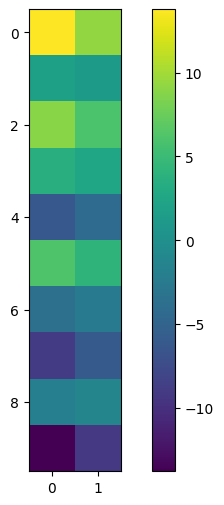

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(W1, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()